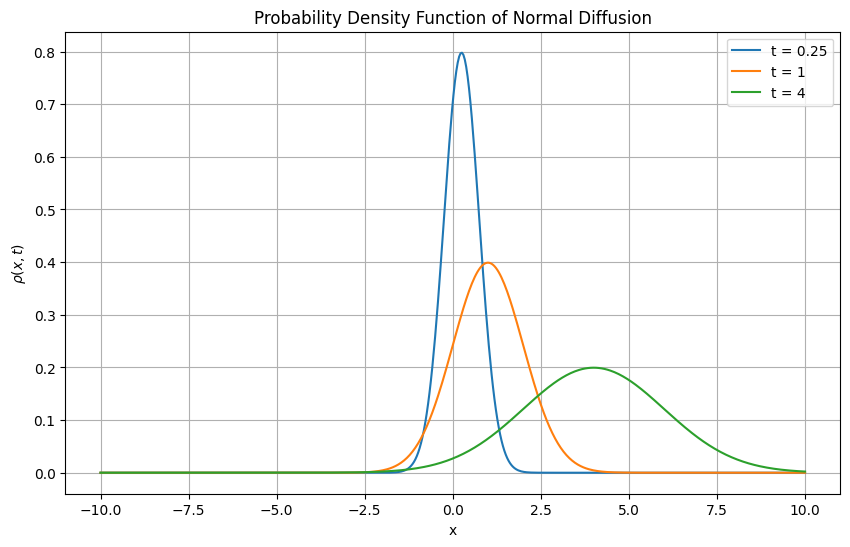

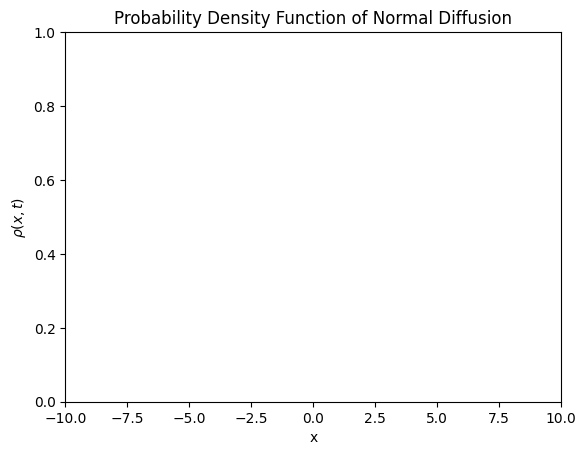

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definicja PDF
def diffusion_pdf(x, t, v=1, D=1):
    return (1 / np.sqrt(2 * np.pi * D * t)) * np.exp(-((x - v * t) ** 2) / (2 * D * t))

# Parametry
v = 1
D = 1
times = [0.25, 1, 4]
x = np.linspace(-10, 10, 500)

# Generowanie statycznych wykresów
plt.figure(figsize=(10, 6))
for t in times:
    plt.plot(x, diffusion_pdf(x, t, v, D), label=f"t = {t}")
plt.title("Probability Density Function of Normal Diffusion")
plt.xlabel("x")
plt.ylabel(r"$\rho(x, t)$")
plt.legend()
plt.grid()
plt.show()

# Animacja
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel(r'$\rho(x, t)$')
ax.set_title('Probability Density Function of Normal Diffusion')

# Inicjalizacja
def init():
    line.set_data([], [])
    return line,

# Funkcja animacji
def animate(i):
    t = times[i]
    y = diffusion_pdf(x, t, v, D)
    line.set_data(x, y)
    ax.set_title(f'PDF at t = {t}')
    return line,

plt.show()

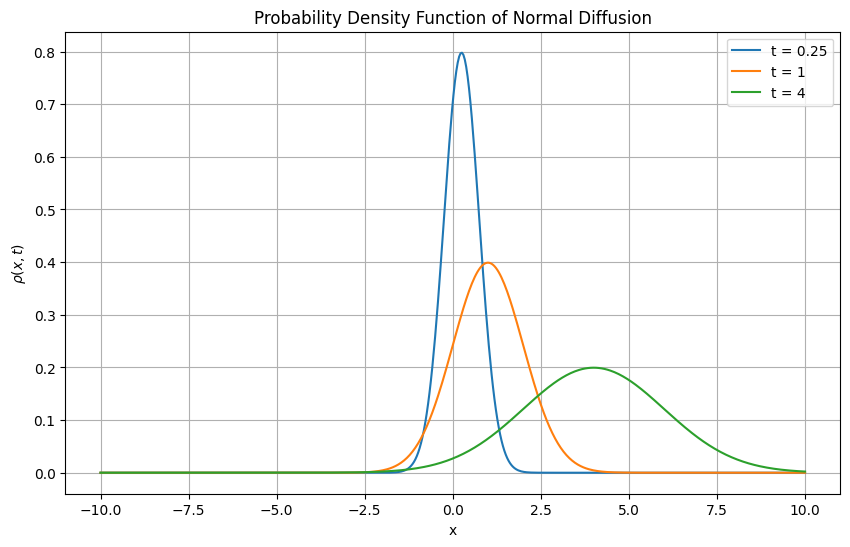

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definiujemy funkcje PDF
def diffusion_pdf(x, t, v=1, D=1):
    return (1 / np.sqrt(2 * np.pi * D * t)) * np.exp(-((x - v * t) ** 2) / (2 * D * t))

# Parametry
v = 1
D = 1
times = [0.25, 1, 4]
x = np.linspace(-10, 10, 500)

# tworzenie wykresów
plt.figure(figsize=(10, 6))
for t in times:
    y = diffusion_pdf(x, t, v, D)
    plt.plot(x, y, label=f"t = {t}")

# ustawienia wykresu
plt.title("Probability Density Function of Normal Diffusion")
plt.xlabel("x")
plt.ylabel(r"$\rho(x, t)$")
plt.legend()
plt.grid()
plt.show()


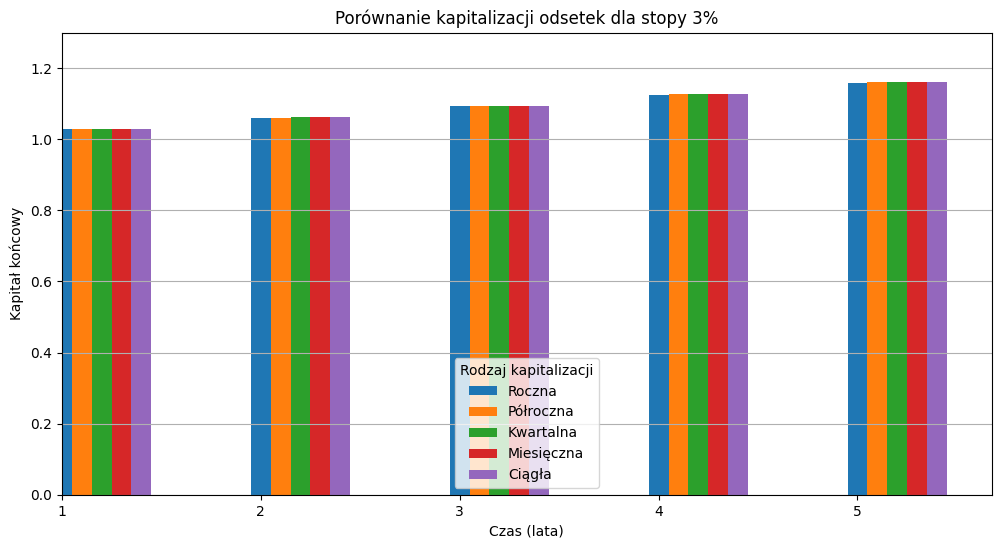

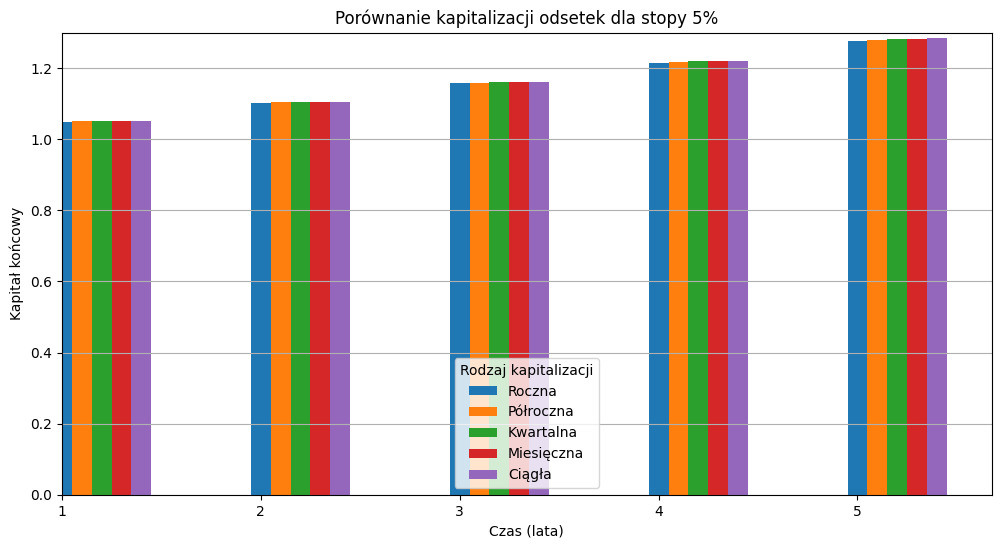

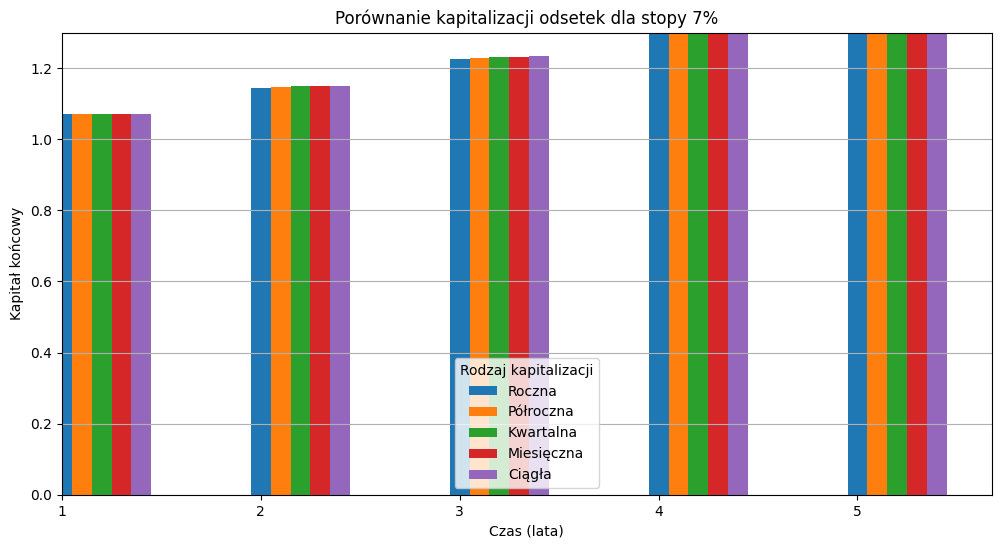

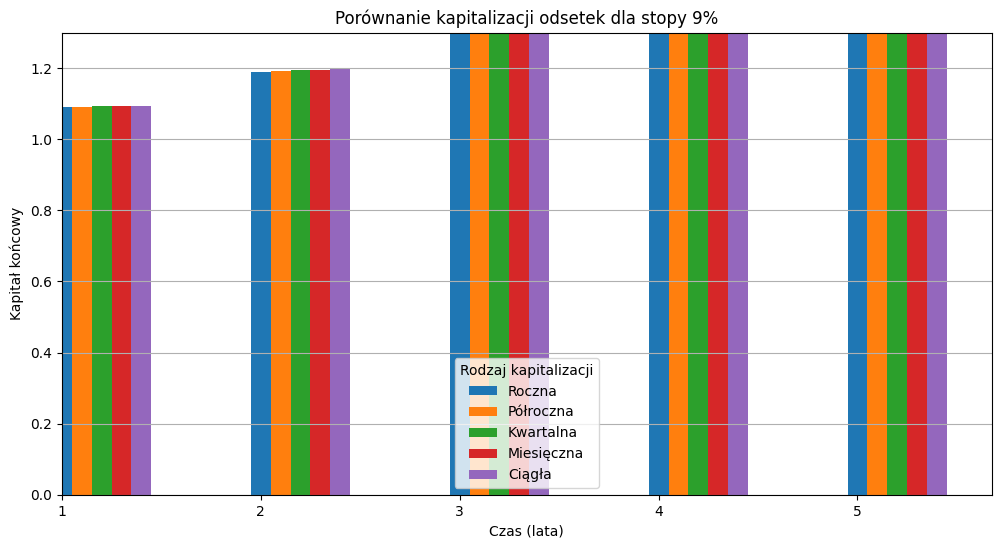

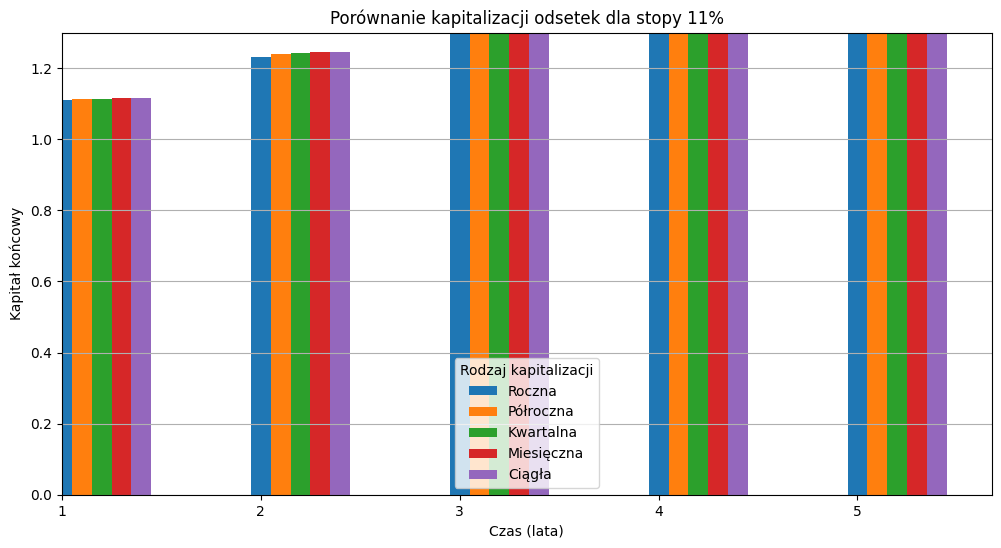

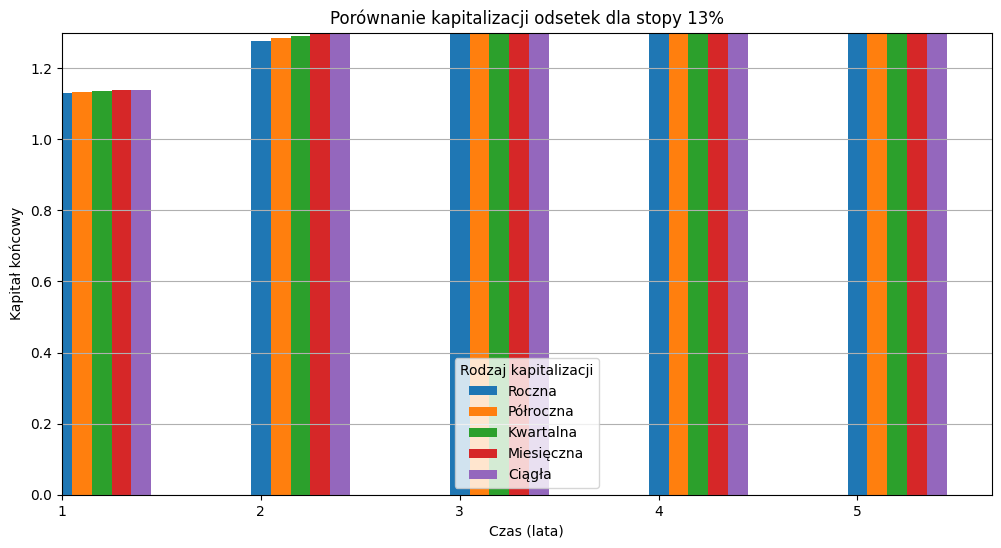

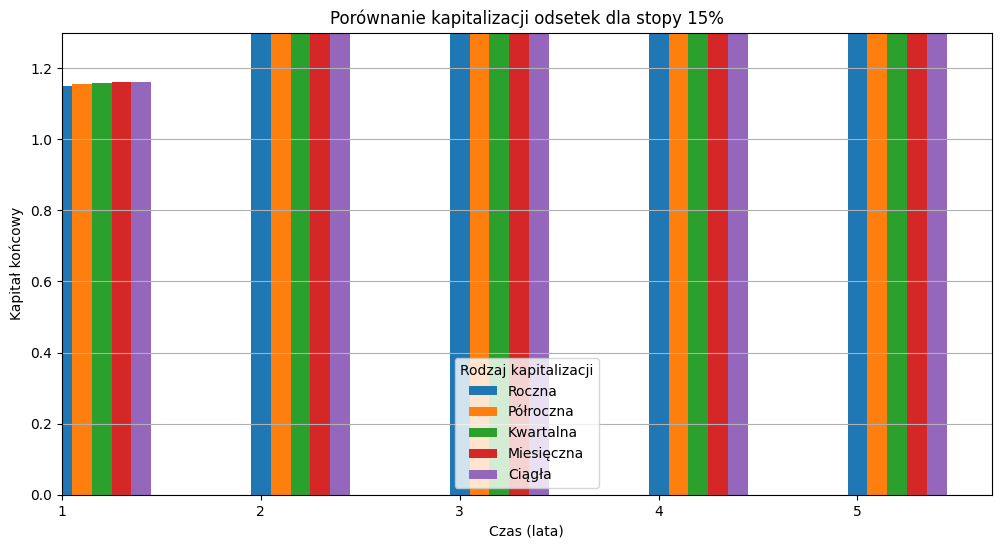

In [ ]:
# zad 1 lista 3 Ekonofizyka


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parametry
rates = np.arange(0.03, 0.16, 0.02)  # Nominalne stopy procentowe: 3%, 5%, ..., 15%
compounding_frequencies = {
    "Roczna": 1,
    "Półroczna": 2,
    "Kwartalna": 4,
    "Miesięczna": 12,
    "Ciągła": np.inf
}
years = np.arange(1, 6)  # Czas w latach

# Funkcja obliczająca kapitał końcowy
def compound_interest(principal, rate, time, frequency):
    if frequency == np.inf:  # Kapitalizacja ciągła
        return principal * np.exp(rate * time)
    else:  # Kapitalizacja dyskretna
        return principal * (1 + rate / frequency) ** (frequency * time)

# Obliczenia
results = []
principal = 1  # Zakładamy 1 jednostkę bazową dla uproszczenia
for r in rates:
    for t in years:
        for freq_name, freq in compounding_frequencies.items():
            final_amount = compound_interest(principal, r, t, freq)
            results.append({"Stopa (%)": r * 100, "Czas (lata)": t, "Kapitalizacja": freq_name, "Kapitał końcowy": final_amount})

# Tworzenie DataFrame
df = pd.DataFrame(results)

# Tworzenie wykresu dla każdej stopy procentowej
for r in rates:
    plt.figure(figsize=(12 , 6))
    subset = df[df["Stopa (%)"] == r * 100]
    for freq_name in compounding_frequencies.keys():
        subset_freq = subset[subset["Kapitalizacja"] == freq_name]
        plt.bar(subset_freq["Czas (lata)"] + 0.1 * list(compounding_frequencies.keys()).index(freq_name),
                subset_freq["Kapitał końcowy"], width=0.1, label=freq_name)

    # Ustawienia wykresu
    plt.title(f"Porównanie kapitalizacji odsetek dla stopy {r * 100:.0f}%")
    plt.xlabel("Czas (lata)")
    plt.ylabel("Kapitał końcowy")
    plt.xticks(years)
    plt.legend(loc = 'lower center',title="Rodzaj kapitalizacji")
    plt.grid(axis='y')
    plt.xlim(left=1)
    plt.ylim(top=1.3)
    plt.show()


## Zad 3 Lista 3 Pokaż bezpośrednim rachunkiem, że n–ta rata kapitałowa kredytu spłacanego stałymi
##kwotami płatności (Tn) jest różnicą pozostającego do spłaty kredytu odpowiednio po
 ## n-1 - ej racie (Kn) i n-tej racie (Kn) tj, że

 ## Tn = Kn – 1 - Kn

## Wzór na stałą ratę \( P \)

Wzór na stałą miesięczną ratę przy kredycie:
\[
P = \frac{K \cdot r \cdot (1 + r)^n}{(1 + r)^n - 1}
\]

Gdzie:
- \( K \) – kwota kredytu (kapitał),
- \( r \) – miesięczna stopa procentowa (\( r = \text{roczna stopa procentowa} / 12 \)),
- \( n \) – liczba rat.


\## Wzór na \( P \) – Stała Rata

Wzór na stałą miesięczną ratę kredytu:
\[
P = \frac{K \cdot r \cdot (1 + r)^n}{(1 + r)^n - 1}
\]

Gdzie:
- \( K \) – całkowita kwota kredytu (kapitał),
- \( r \) – miesięczna stopa procentowa, obliczona jako:
  \[
  r = \frac{\text{roczna stopa procentowa}}{12}
  \]
- \( n \) – liczba rat.


In [ ]:
def loan_repayment_schedule(loan_amount, annual_interest_rate, num_installments):
    """
    Obliczamy harmonogram spłaty kredytu stałymi ratami i sprawdza relację Tn = K(n-1) - Kn.

    Parametry:
    - loan_amount: całkowita kwota kredytu
    - annual_interest_rate: roczna stopa procentowa (w ułamku, np. 0.05 dla 5%)
    - num_installments: liczba rat

    Zwraca:
    - Nic, wypisuje wyniki w terminalu
    """
    monthly_interest_rate = annual_interest_rate / 12  # Miesięczna stopa procentowa
    # Obliczenie stałej raty miesięcznej (P) przy pomocy wzoru na annuitet
    P = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** num_installments) / \
        ((1 + monthly_interest_rate) ** num_installments - 1)

    # Inicjalizacja pozostałej kwoty kredytu (Kn)
    Kn = loan_amount

    print(f"Stała rata miesięczna (P): {P:.2f}\n")
    print(f"{'Rata':<5} {'Pozostały Kapitał K(n-1)':<30} {'Pozostały Kapitał Kn':<25} {'Rata Kapitałowa Tn':<20}")
    print("=" * 80)

    for n in range(1, num_installments + 1):
        # Odsetki dla bieżącej raty
        interest_payment = Kn * monthly_interest_rate
        # Rata kapitałowa Tn
        Tn = P - interest_payment
        # Pozostała kwota kredytu po bieżącej racie (Kn po spłacie Tn)
        Kn_next = Kn - Tn

        # Wypisanie wyników
        print(f"{n:<5} {Kn:<30.2f} {Kn_next:<25.2f} {Tn:<20.2f}")

        # Aktualizacja Kn dla kolejnej iteracji
        Kn = Kn_next


# Parametry kredytu
loan_amount = 100000  # Kwota kredytu
annual_interest_rate = 0.05  # Roczna stopa procentowa (5%)
num_installments = 12  # Liczba rat

# Wywołanie funkcji
loan_repayment_schedule(loan_amount, annual_interest_rate, num_installments)


Stała rata miesięczna (P): 8560.75

Rata  Pozostały Kapitał K(n-1)       Pozostały Kapitał Kn      Rata Kapitałowa Tn  
1     100000.00                      91855.92                  8144.08             
2     91855.92                       83677.90                  8178.02             
3     83677.90                       75465.81                  8212.09             
4     75465.81                       67219.51                  8246.31             
5     67219.51                       58938.84                  8280.67             
6     58938.84                       50623.67                  8315.17             
7     50623.67                       42273.85                  8349.82             
8     42273.85                       33889.25                  8384.61             
9     33889.25                       25469.70                  8419.54             
10    25469.70                       17015.08                  8454.62             
11    17015.08                       852

## zad 4

In [ ]:
def calculate_total_interest(K, r_rocz, n):
    r_mies = r_rocz / 12
    P = (K * r_mies * (1 + r_mies)**n) / ((1 + r_mies)**n - 1)
    calk_oplata = P * n
    calk_stopa = calk_oplata - K
    return calk_stopa, calk_oplata

# Dane wejściowe
K = 100_000  # Kwota kredytu
r_rocz = 0.06  # Roczne oprocentowanie

# Opcja 1: 12 rat
stopa_12, total_12 = calculate_total_interest(K, r_rocz, 12)

# Opcja 2: 60 rat
stopa_60, total_60 = calculate_total_interest(K, r_rocz, 60)

print(f"Odsetki dla 12 rat: {stopa_12:.2f} PLN")
print(f"Całkowita spłata dla 12 rat: {total_12:.2f} PLN")
print(f"Odsetki dla 60 rat: {stopa_60:.2f} PLN")
print(f"Całkowita spłata dla 60 rat: {total_60:.2f} PLN")


Odsetki dla 12 rat: 3279.72 PLN
Całkowita spłata dla 12 rat: 103279.72 PLN
Odsetki dla 60 rat: 15996.81 PLN
Całkowita spłata dla 60 rat: 115996.81 PLN


   Kredyt na 12 rat generuje mniejsze odsetki (ale większe raty).
   Kredyt na 60 rat generuje większe odsetki, ale rozkłada obciążenie klienta na dłuższy czas.

Interpretacja:

 Dla banku bardziej opłacalne są kredyty z większą liczbą rat, ponieważ odsetki stanowią ich zysk.
 Klient o niskim ryzyku kredytowym spłacający kredyt przez długi czas minimalizuje ryzyko dla banku i maksymalizuje jego dochody z odsetek.


 Kiedy oprocentowanie jest stałe, bank zarabia na odsetkach, które są naliczane od pozostającego do spłaty kapitału. W przypadku kredytów:
  a) Kredyty z większą liczbą rat:

Miesięczne raty są niższe, ale kredytobiorca płaci odsetki przez dłuższy czas.
Całkowita suma odsetek zapłaconych przez kredytobiorcę jest wyższa niż w przypadku krótszego kredytu.
Opłacalne dla banku: Dłuższy okres kredytowania oznacza większe dochody z odsetek.

b) Kredyty z mniejszą liczbą rat:

Miesięczne raty są wyższe, a czas spłaty krótszy.
Kredytobiorca zapłaci mniej odsetek w sumie.
Korzyści dla banku: Kapitał spłacany szybciej może być reinwestowany.

Ekonofizyka Lista 3/ zad 6

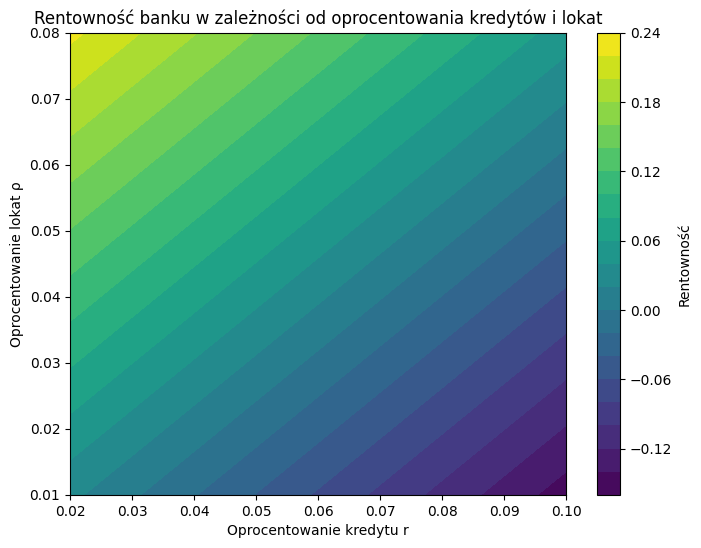

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
r = np.linspace(0.02, 0.1, 100)  # Oprocentowanie kredytów od 2% do 10%
rho = np.linspace(0.01, 0.08, 100)  # Oprocentowanie lokat od 1% do 8%
tau = 5  # Średni czas trwania lokaty i kredytu (5 lat)

# Funkcja obliczająca rentowność
def rentownosc(r, rho, tau):
    return (r - rho) * tau / 2

# Symulacja
zysk = rentownosc(r[:, None], rho[None, :], tau)

# Wykres
plt.figure(figsize=(8, 6))
cp = plt.contourf(r, rho, zysk, 20, cmap='viridis')
plt.colorbar(cp, label='Rentowność')
plt.xlabel('Oprocentowanie kredytu r')
plt.ylabel('Oprocentowanie lokat ρ')
plt.title('Rentowność banku w zależności od oprocentowania kredytów i lokat')
plt.show()


In [ ]:
# Losowanie kredytów i lokat
np.random.seed(42)

# Liczba symulacji
n = 1000
kredyty = np.random.uniform(100000, 1000000, n)  # Losowe kwoty kredytów
lokaty = np.random.uniform(100000, 1000000, n)  # Losowe kwoty lokat

# Obliczanie zysku
zysk_symulacja = (kredyty * r[0] - lokaty * rho[0]) * tau / 2

# Średni zysk
sredni_zysk = np.mean(zysk_symulacja)

print(f"Średni zysk banku w symulacji: {sredni_zysk:.2f} PLN")


Średni zysk banku w symulacji: 13153.66 PLN


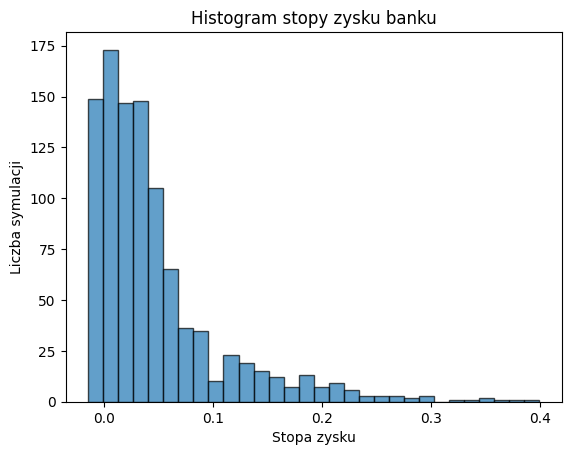

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
r = 0.05  # nominalne oprocentowanie kredytów (5%)
rho = 0.02  # nominalne oprocentowanie lokat (2%)
tau = 1  # średni czas trwania lokaty i kredytu (1 rok)
num_simulations = 1000  # liczba symulacji

# Losowanie kwot lokat i kredytów
np.random.seed(42)
loans = np.random.uniform(1000, 10000, num_simulations)
deposits = np.random.uniform(1000, 10000, num_simulations)

# Obliczanie odsetek
interest_loans = loans * r * tau
interest_deposits = deposits * rho * tau

# Obliczanie stopy zysku
profit_rate = (interest_loans - interest_deposits) / deposits

# Wykres wyników
plt.hist(profit_rate, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Stopa zysku')
plt.ylabel('Liczba symulacji')
plt.title('Histogram stopy zysku banku')
plt.show()


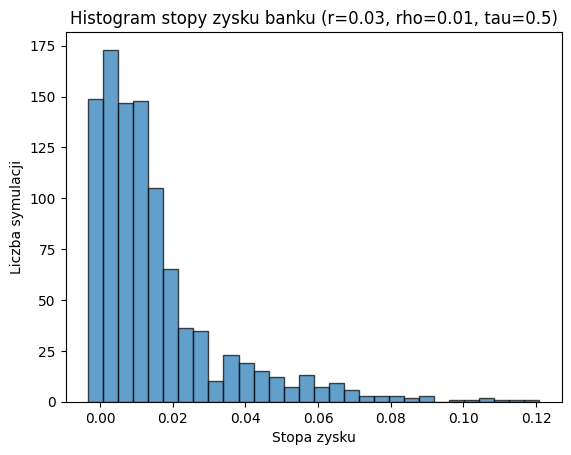

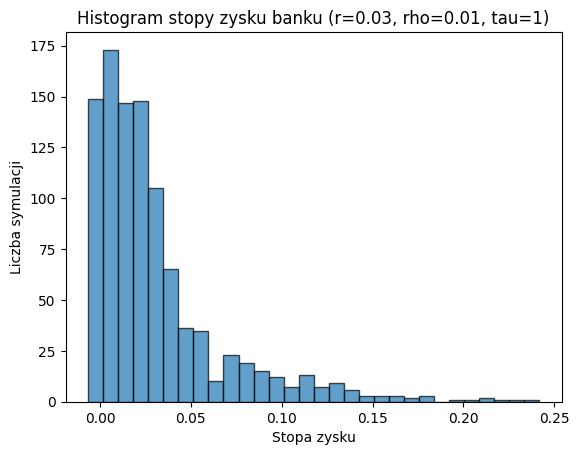

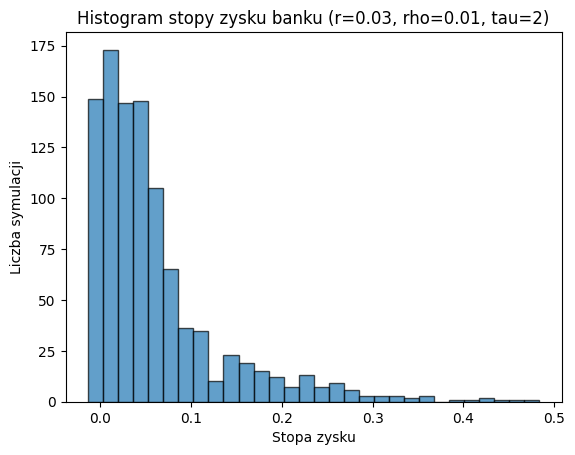

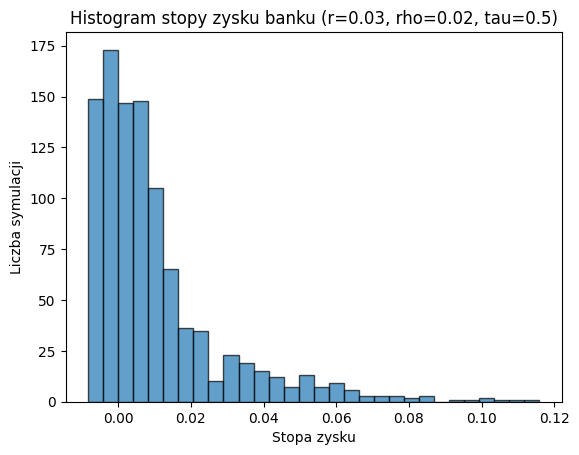

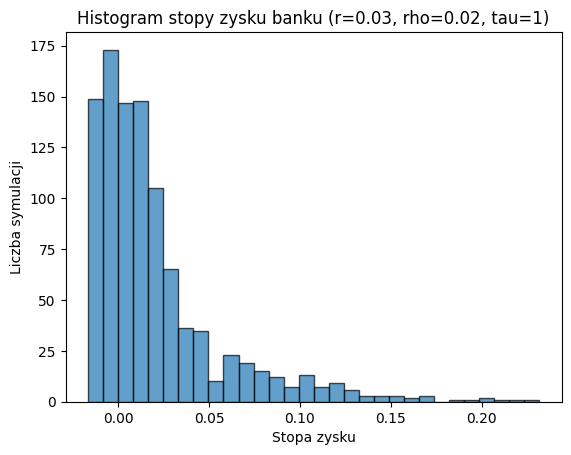

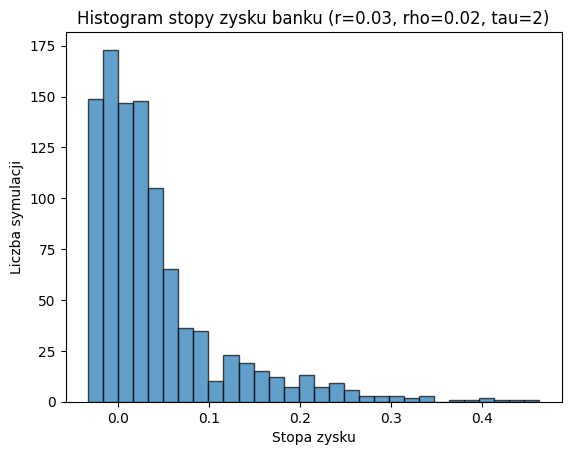

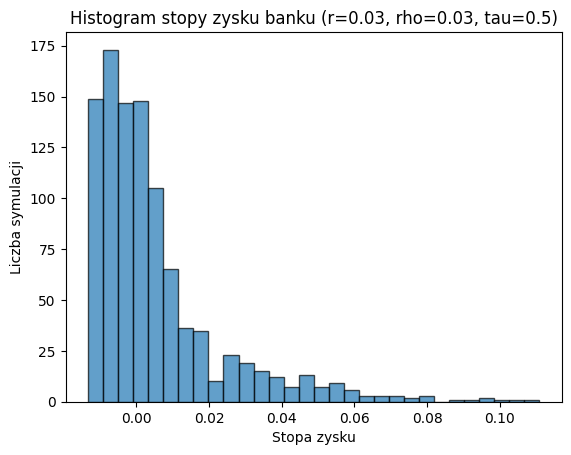

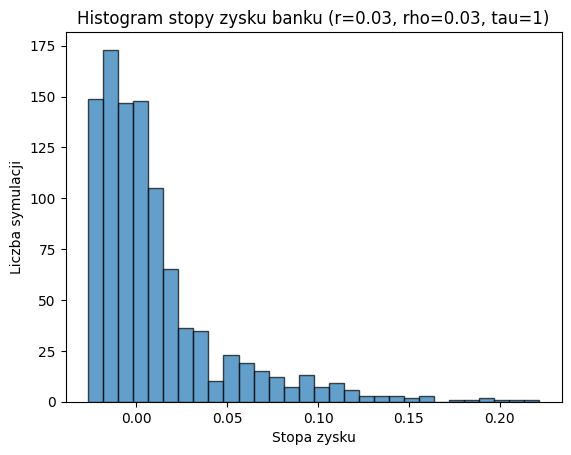

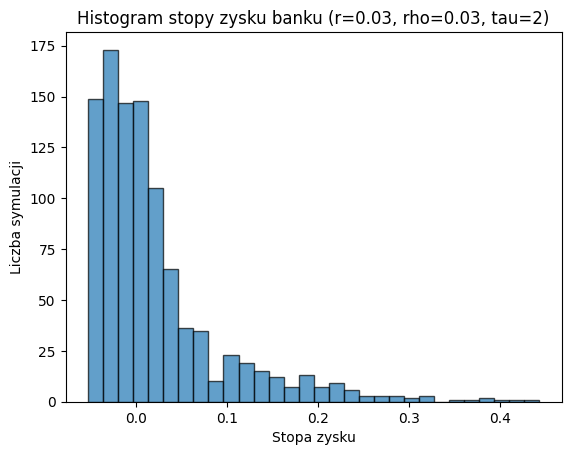

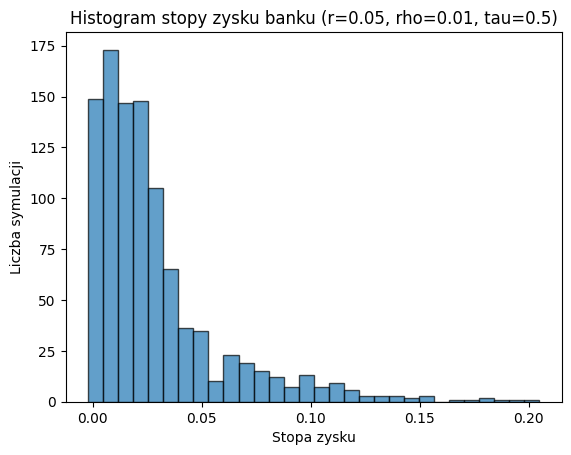

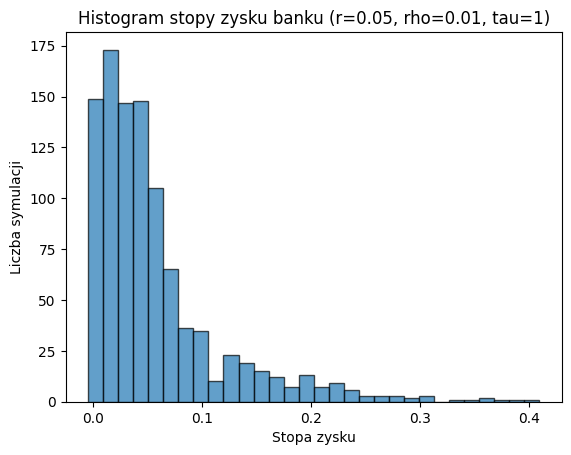

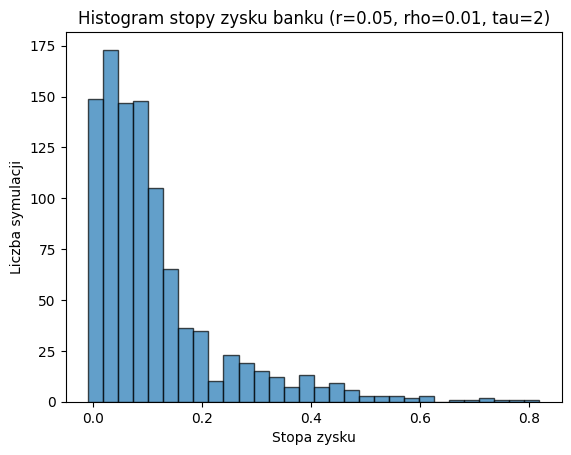

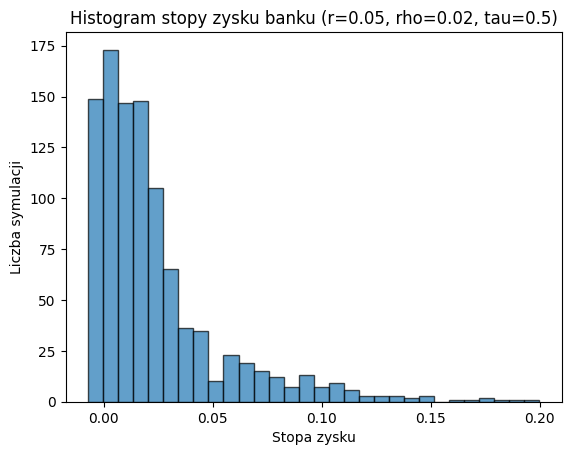

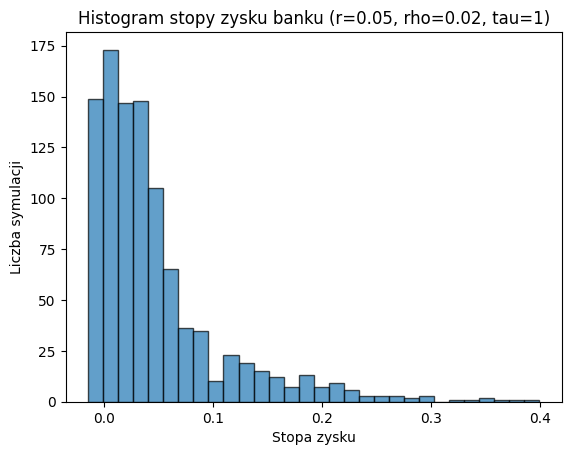

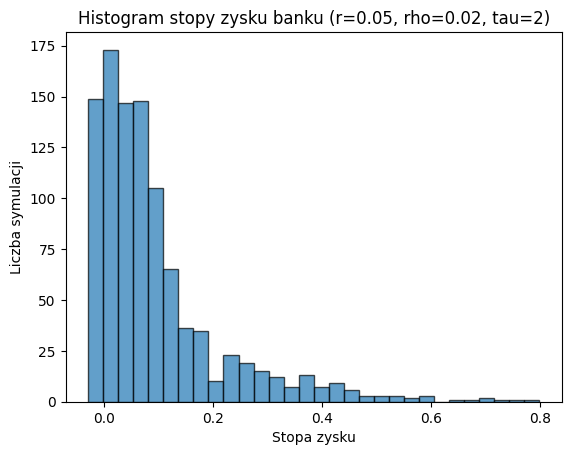

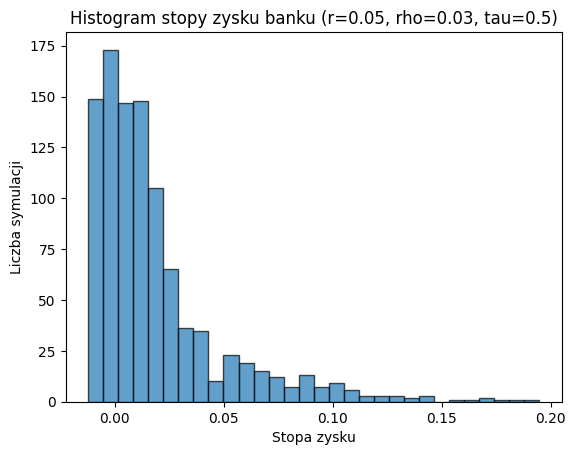

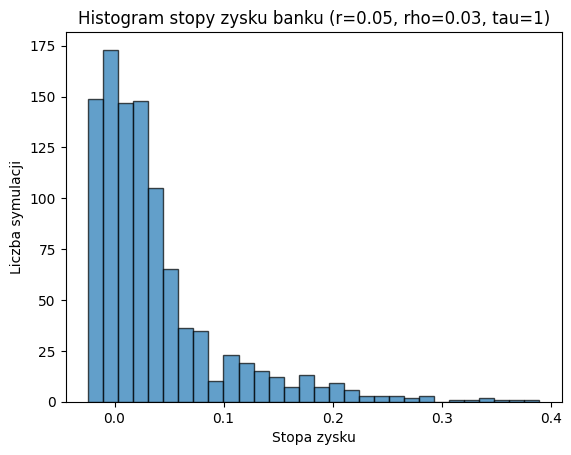

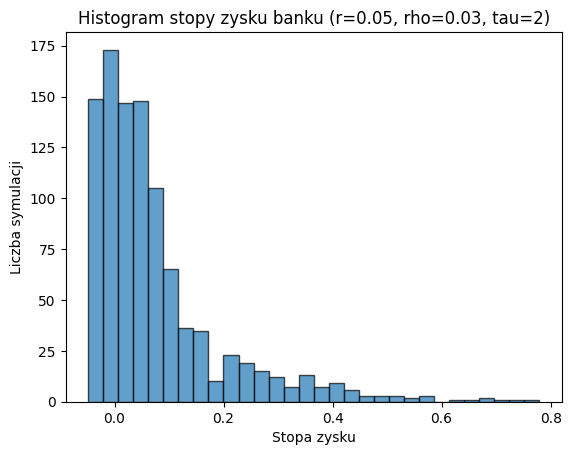

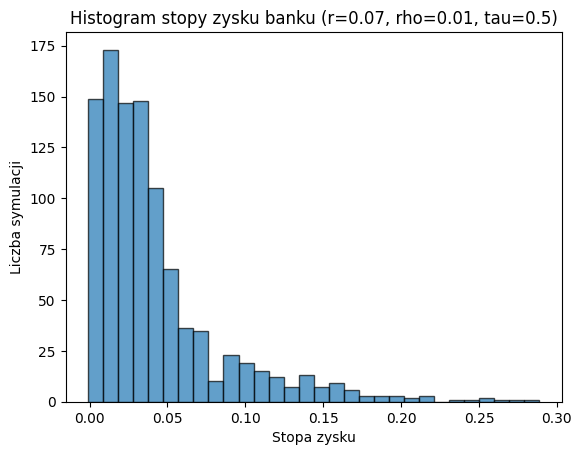

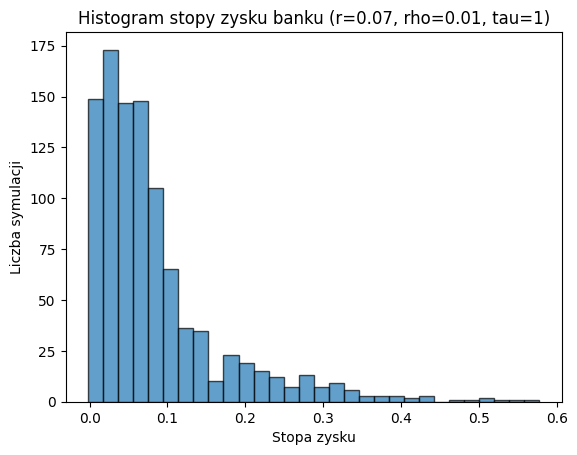

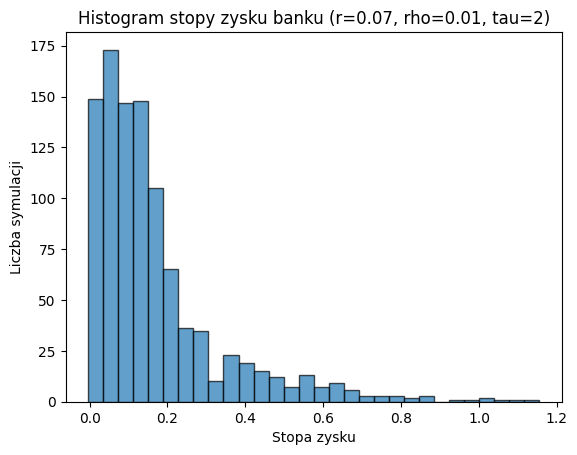

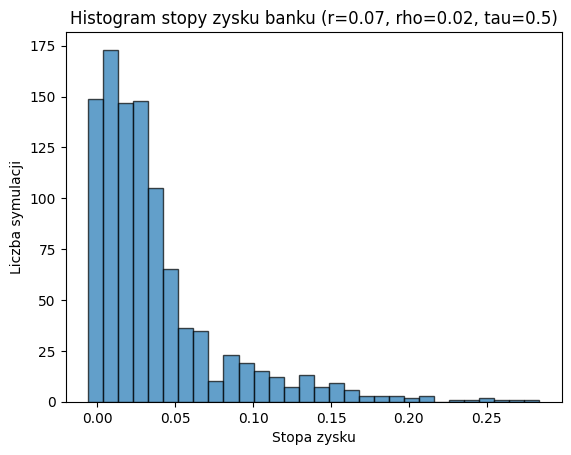

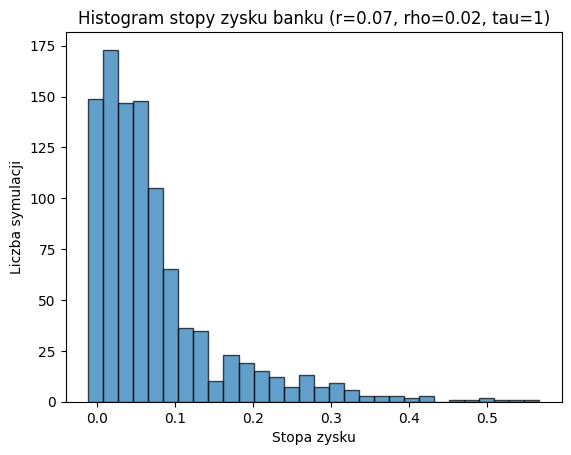

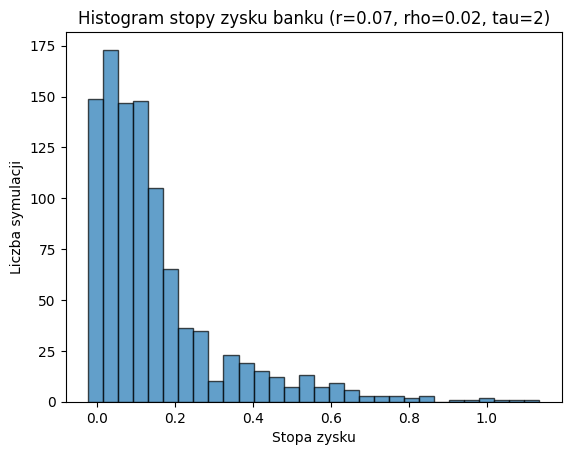

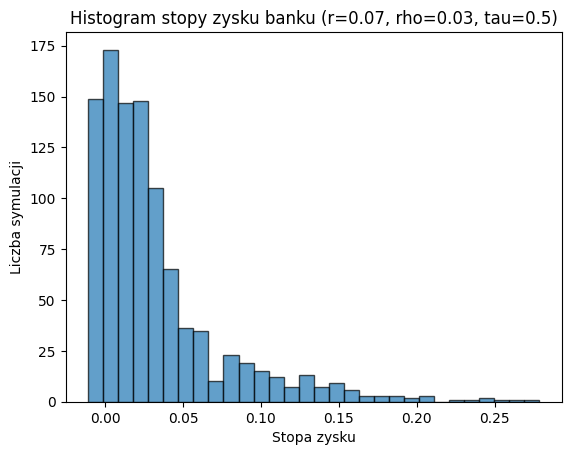

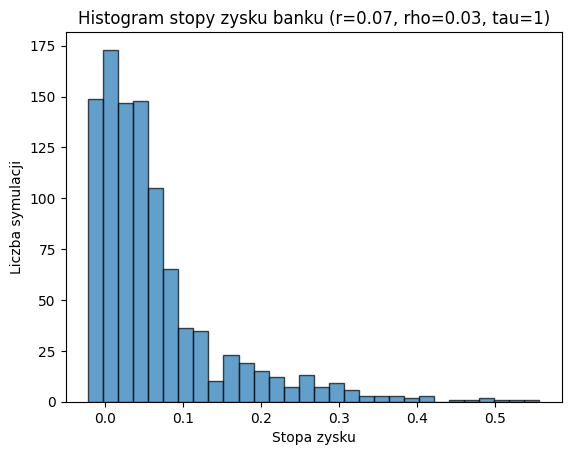

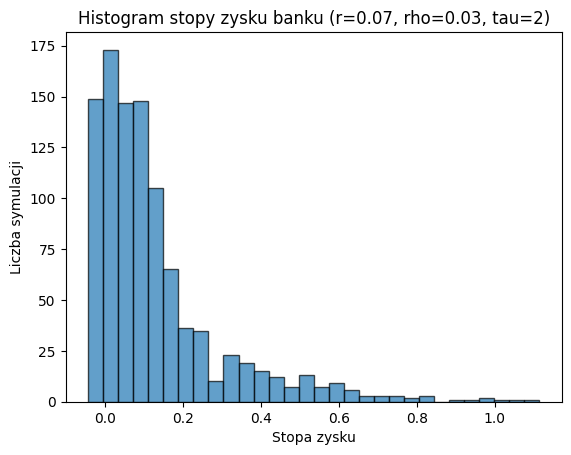

In [ ]:
# Przykładowe wartości parametrów
r_values = [0.03, 0.05, 0.07]
rho_values = [0.01, 0.02, 0.03]
tau_values = [0.5, 1, 2]

# Symulacja dla różnych wartości parametrów
for r in r_values:
    for rho in rho_values:
        for tau in tau_values:
            interest_loans = loans * r * tau
            interest_deposits = deposits * rho * tau
            profit_rate = (interest_loans - interest_deposits) / deposits
            plt.hist(profit_rate, bins=30, edgecolor='k', alpha=0.7)
            plt.xlabel('Stopa zysku')
            plt.ylabel('Liczba symulacji')
            plt.title(f'Histogram stopy zysku banku (r={r}, rho={rho}, tau={tau})')
            plt.show()


Step 1: Preprocessing the Time-Series Data


In [ ]:
# Radial Basic Function
#Converting a time series into input-output pairs

import numpy as np

def create_time_series_data(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])  # Past window_size points as input
        y.append(series[i+window_size])    # Next point as the target
    return np.array(X), np.array(y)

# Example: Predicting stock prices using past 5 days
time_series_data = np.sin(np.linspace(0, 10, 100))  # Synthetic data
X_train, y_train = create_time_series_data(time_series_data, window_size=5)



Step 2: Defining the RBF-Based Time-Series Model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class RBF(nn.Module):
    """ Custom Radial Basis Function Layer """
    def __init__(self, in_features, centres, basis_func):
        super().__init__()
        self.centres = nn.Parameter(centres)  # RBF centres
        self.basis_func = basis_func

    def forward(self, x):
        # Compute distance between inputs and centres, then apply basis function
        return self.basis_func(-torch.cdist(x, self.centres)**2)

class RBFNetwork(nn.Module):
    def __init__(self, layer_widths, layer_centres, basis_func=torch.exp):
        super().__init__()
        self.rbf_layers = nn.ModuleList()
        self.linear_layers = nn.ModuleList()

        for i in range(len(layer_widths) - 1):
            self.rbf_layers.append(RBF(layer_widths[i], layer_centres[i], basis_func))
            self.linear_layers.append(nn.Linear(layer_centres[i].size(0), layer_widths[i+1]))

    def forward(self, x):
        for rbf_layer, linear_layer in zip(self.rbf_layers, self.linear_layers):
            x = rbf_layer(x)  # Apply RBF transformation
            x = linear_layer(x)  # Apply linear transformation
        return x


Step 3: Training the Model on Time-Series Data



In [ ]:
# Convert NumPy to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define training dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Initialize Model
layer_widths = [5, 10, 1]  # Input layer (5), hidden (10), output (1)
layer_centres = [torch.randn(5, 5), torch.randn(10, 10)]  # RBF centres
model = RBFNetwork(layer_widths, layer_centres)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training Loop
epochs = 500
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.4161
Epoch 50, Loss: 0.0004
Epoch 100, Loss: 0.0007
Epoch 150, Loss: 0.0001
Epoch 200, Loss: 0.0005
Epoch 250, Loss: 0.0004
Epoch 300, Loss: 0.0005
Epoch 350, Loss: 0.0003
Epoch 400, Loss: 0.0004
Epoch 450, Loss: 0.0001


Step 4: Making Predictions



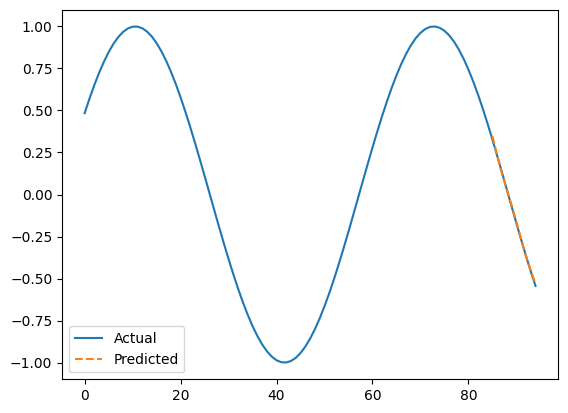

In [ ]:
X_test = X_train_tensor[-10:]  # Last 10 samples for testing
y_pred = model(X_test).detach().numpy()  # Get predictions

import matplotlib.pyplot as plt
plt.plot(range(len(y_train)), y_train, label="Actual")
plt.plot(range(len(y_train)-10, len(y_train)), y_pred, label="Predicted", linestyle='dashed')
plt.legend()
plt.show()


Gaussian distribution and fat-tailed distribution for price prediction - Student distribution

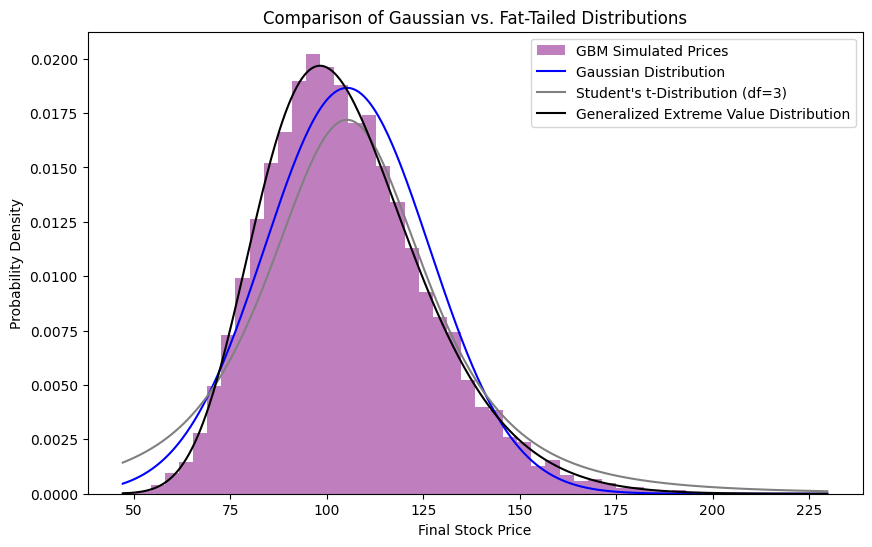

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for Geometric Brownian Motion
S0 = 100      # Initial stock price
mu = 0.05     # Drift (expected return)
sigma = 0.2   # Volatility
T = 1         # Time horizon (1 year)
n = 252       # Number of time steps (daily returns)
M = 10000     # Number of simulations

dt = T / n

def geometric_brownian_motion(S0, mu, sigma, n, M):
    W = np.random.randn(M, n) * np.sqrt(dt)  # Brownian motion increments
    S = np.zeros((M, n + 1))
    S[:, 0] = S0
    for t in range(1, n + 1):
        S[:, t] = S[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W[:, t - 1])
    return S[:, -1]  # Return final prices

# Simulate stock prices
final_prices = geometric_brownian_motion(S0, mu, sigma, n, M)

# Fit Gaussian distribution
mu_g, sigma_g = np.mean(final_prices), np.std(final_prices)
gaussian_fit = stats.norm(mu_g, sigma_g)

# Fit fat-tailed distributions
student_t_fit = stats.t(df=3, loc=np.mean(final_prices), scale=np.std(final_prices))
gev_fit = stats.genextreme(*stats.genextreme.fit(final_prices))

# Plot distributions
x = np.linspace(min(final_prices), max(final_prices), 500)
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, density=True, alpha=0.5, label='GBM Simulated Prices', color='purple')
plt.plot(x, gaussian_fit.pdf(x), color='blue', linestyle='-', label='Gaussian Distribution')
plt.plot(x, student_t_fit.pdf(x), color='gray', linestyle='-', label="Student's t-Distribution (df=3)")
plt.plot(x, gev_fit.pdf(x), color='black', linestyle='-', label='Generalized Extreme Value Distribution')
plt.xlabel('Final Stock Price')
plt.ylabel('Probability Density')
plt.title('Comparison of Gaussian vs. Fat-Tailed Distributions')
plt.legend()
plt.show()


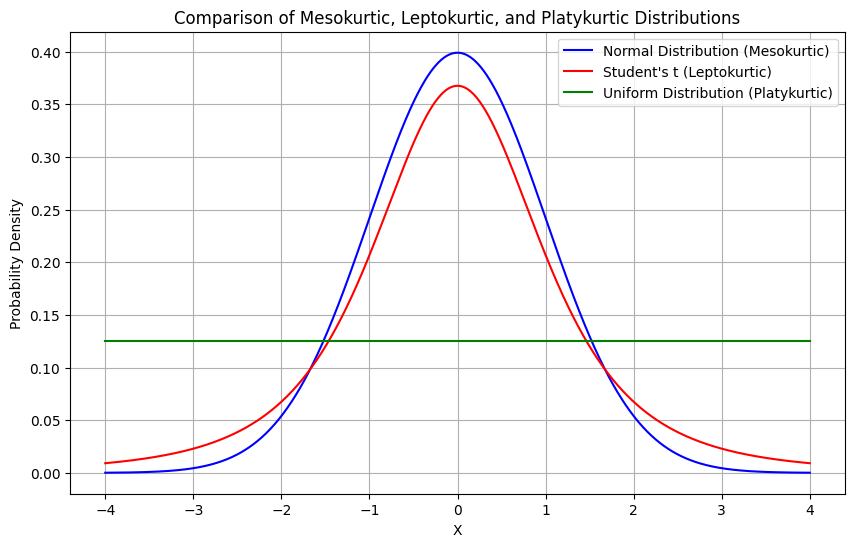

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate x values
x = np.linspace(-4, 4, 1000)

# Standardized normal distribution (mesokurtic)
normal_pdf = stats.norm.pdf(x)

# Leptokurtic distribution (Student's t with df=3, fat-tailed)
student_t_pdf = stats.t.pdf(x, df=3)

# Platykurtic distribution (Uniform, rescaled for comparison)
uniform_pdf = np.full_like(x, 1/8)  # Constant density over [-4, 4]

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf, 'b-', label='Normal Distribution (Mesokurtic)')
plt.plot(x, student_t_pdf, 'r-', label="Student's t (Leptokurtic)")

plt.plot(x, uniform_pdf, 'g-', label='Uniform Distribution (Platykurtic)')

# Labels and legend
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Comparison of Mesokurtic, Leptokurtic, and Platykurtic Distributions')
plt.legend()
plt.grid()
plt.show()


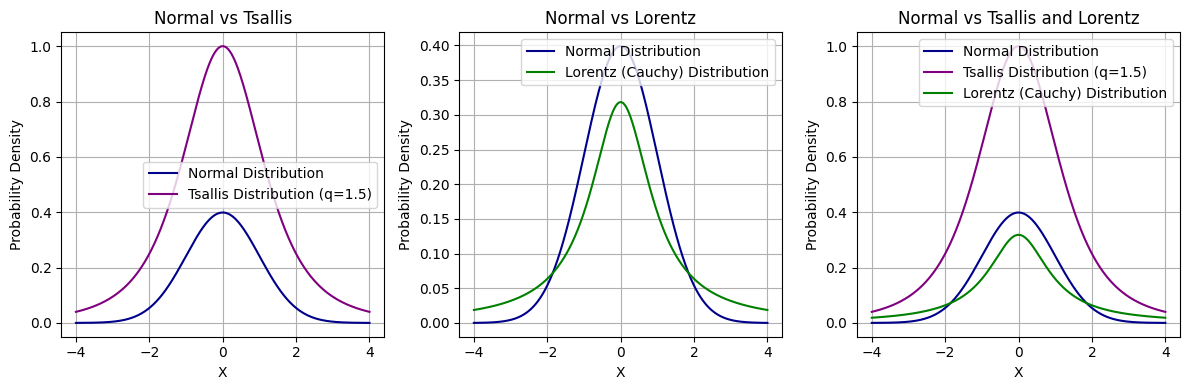

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate x values
x = np.linspace(-4, 4, 1000)

# Standardized normal distribution (mesokurtic)
normal_pdf = stats.norm.pdf(x)

# Tsallis Distribution (approximated by q-Gaussian with q=1.5)
def tsallis_pdf(x, q, beta):
    return (1 - (1-q) * beta * x**2) ** (1 / (1-q)) if q < 3 else np.zeros_like(x)

tsallis_pdf_values = np.array([tsallis_pdf(val, q=1.5, beta=0.5) for val in x])

# Lorentz (Cauchy) Distribution
lorentz_pdf = stats.cauchy.pdf(x)

# Plot distributions side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Normal vs Tsallis
axes[0].plot(x, normal_pdf, color='darkblue', label='Normal Distribution')
axes[0].plot(x, tsallis_pdf_values, color='purple', label='Tsallis Distribution (q=1.5)')
axes[0].set_title('Normal vs Tsallis')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Probability Density')
axes[0].legend()
axes[0].grid()

# Normal vs Lorentz
axes[1].plot(x, normal_pdf, color='darkblue', label='Normal Distribution')
axes[1].plot(x, lorentz_pdf, color='green', label='Lorentz (Cauchy) Distribution')
axes[1].set_title('Normal vs Lorentz')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Probability Density')
axes[1].legend()
axes[1].grid()

# Normal vs both (for better visualization)
axes[2].plot(x, normal_pdf, color='darkblue', label='Normal Distribution')
axes[2].plot(x, tsallis_pdf_values, color='purple', label='Tsallis Distribution (q=1.5)')
axes[2].plot(x, lorentz_pdf, color='green', label='Lorentz (Cauchy) Distribution')
axes[2].set_title('Normal vs Tsallis and Lorentz')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Probability Density')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()


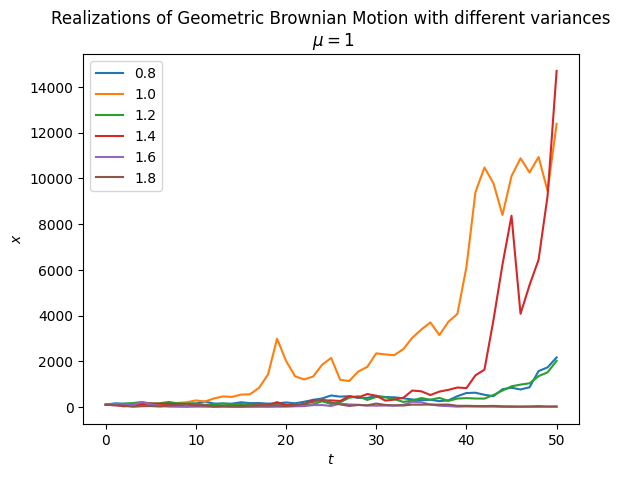

In [ ]:
# Python code for the plot

import numpy as np
import matplotlib.pyplot as plt

mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

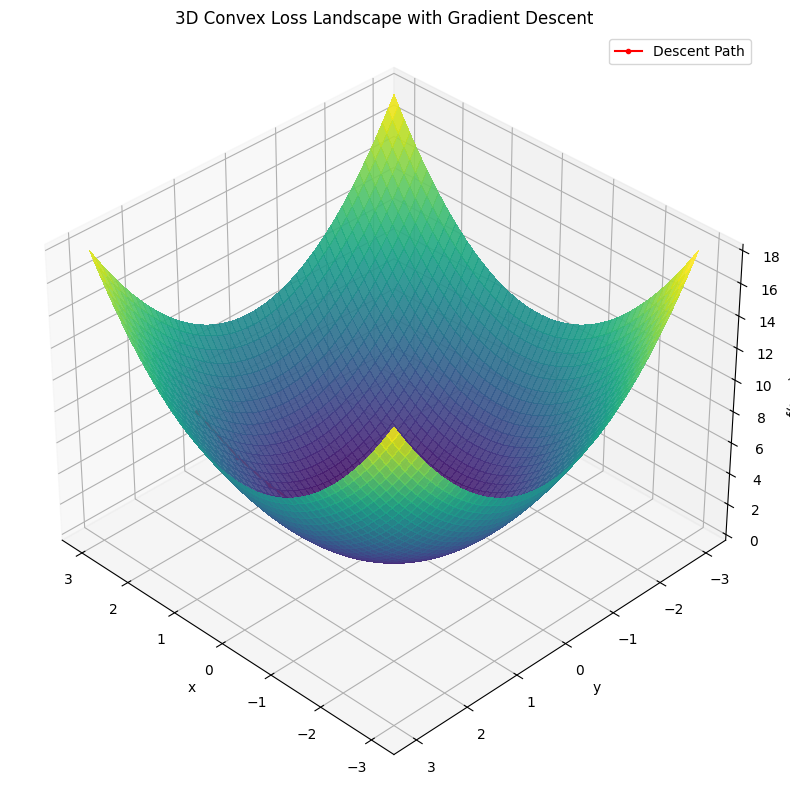

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convex function
def f(x, y):
    return x**2 + y**2

# Gradient
def grad_f(x, y):
    return np.array([2*x, 2*y])

# Gradient descent
def gradient_descent(start, learning_rate, steps):
    path = [start]
    point = start
    for _ in range(steps):
        grad = grad_f(*point)
        point = point - learning_rate * grad
        path.append(point)
    return np.array(path)

# Setup
start_point = np.array([2.0, 2.0])
lr = 0.1
steps = 25
path = gradient_descent(start_point, lr, steps)

# Create grid for surface
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Normalize Z for color gradient
norm = plt.Normalize(Z.min(), Z.max())
colors = plt.cm.viridis(norm(Z))

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0, antialiased=False, alpha=0.9, shade=False)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), 'r.-', markersize=6, label='Descent Path')

# Labels and view angle
ax.set_title('3D Convex Loss Landscape with Gradient Descent')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(elev=35, azim=135)
ax.legend()

plt.tight_layout()
plt.show()

Convex function

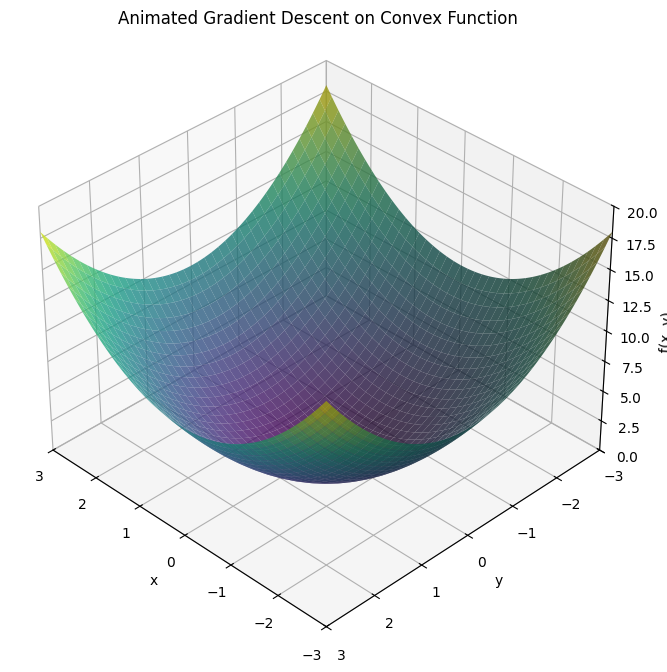

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Convex function
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Gradient descent path
def gradient_descent(start, lr, steps):
    path = [start]
    point = start
    for _ in range(steps):
        grad = grad_f(*point)
        point = point - lr * grad
        path.append(point)
    return np.array(path)

# Setup
start = np.array([2.0, 2.0])
lr = 0.1
steps = 30
path = gradient_descent(start, lr, steps)
zs = f(path[:, 0], path[:, 1])

# Grid for surface
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

norm = plt.Normalize(Z.min(), Z.max())
colors = plt.cm.viridis(norm(Z))

# Plot setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=colors, alpha=0.8, rstride=5, cstride=5, edgecolor='none')

descent_line, = ax.plot([], [], [], 'ro-', linewidth=2)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Animated Gradient Descent on Convex Function')
ax.view_init(35, 135)

# Animation update function
def update(frame):
    descent_line.set_data(path[:frame, 0], path[:frame, 1])
    descent_line.set_3d_properties(zs[:frame])
    return descent_line,

# Animate
anim = FuncAnimation(fig, update, frames=len(path), interval=300, blit=True)
plt.show()

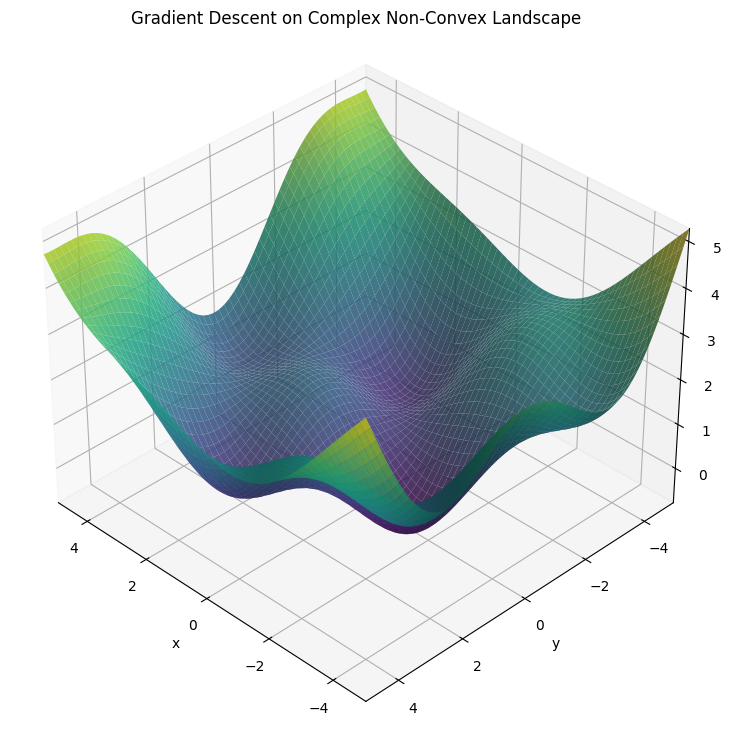

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Complex function with saddle points and local minima/maxima
def f(x, y):
    return np.sin(x) * np.cos(y) + 0.1*(x**2 + y**2)

# Gradient (analytically derived)
def grad_f(x, y):
    dfdx = np.cos(x) * np.cos(y) + 0.2*x
    dfdy = -np.sin(x) * np.sin(y) + 0.2*y
    return np.array([dfdx, dfdy])

# Gradient descent
def gradient_descent(start, lr, steps):
    path = [start]
    point = start
    for _ in range(steps):
        grad = grad_f(*point)
        point = point - lr * grad
        path.append(point)
    return np.array(path)

# Parameters
start = np.array([2.5, 2.5])
lr = 0.05
steps = 50
path = gradient_descent(start, lr, steps)
zs = f(path[:, 0], path[:, 1])

# Grid for surface
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
norm = plt.Normalize(Z.min(), Z.max())
colors = plt.cm.viridis(norm(Z))

# Plot setup
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=colors, alpha=0.85, rstride=5, cstride=5, edgecolor='none')

descent_line, = ax.plot([], [], [], 'ro-', linewidth=2)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(Z.min(), Z.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent on Complex Non-Convex Landscape')
ax.view_init(35, 135)

# Animation update function
def update(frame):
    descent_line.set_data(path[:frame, 0], path[:frame, 1])
    descent_line.set_3d_properties(zs[:frame])
    return descent_line,

# Animate
anim = FuncAnimation(fig, update, frames=len(path), interval=200, blit=True)
plt.show()

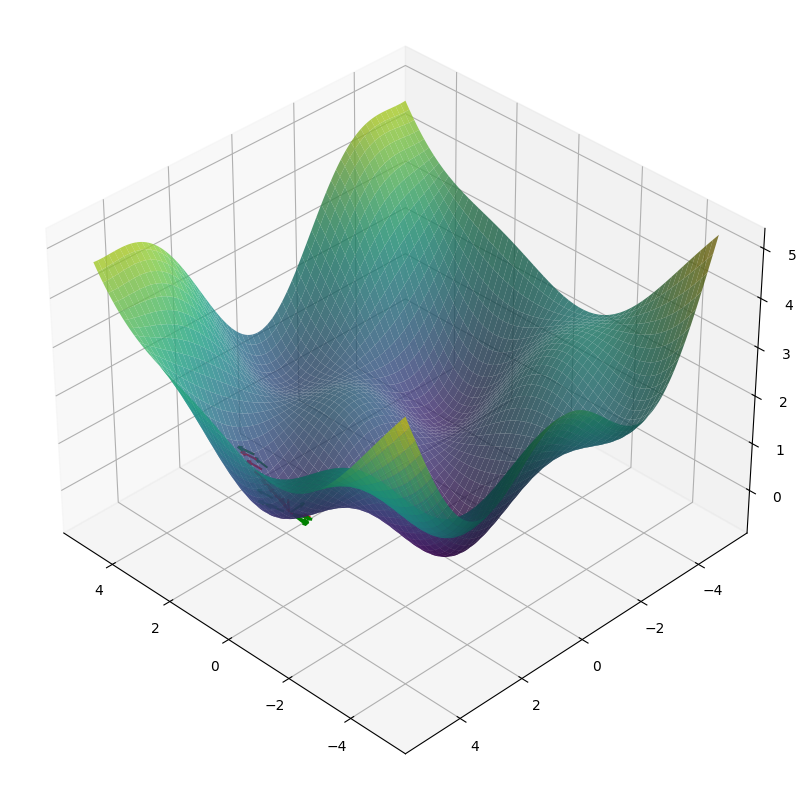